In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(42000, 785)

In [6]:
X = data.drop('label', axis = 1)
y = data['label']

In [7]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1. Standardization

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
X_std = scaler.fit_transform(X)
X_std

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 2. Covariance Matrix

In [11]:
cov_mat = np.cov(X_std.T)
cov_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
cov_mat.shape

(784, 784)

## 3. Compute the Eigen Values & Eigen Vectors

In [13]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [14]:
print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [ 4.06964787e+01  2.91114657e+01  2.67833371e+01  2.08147194e+01
  1.81000206e+01  1.57876737e+01  1.38244007e+01  1.25432643e+01
  1.10638975e+01  1.00889267e+01  9.63617203e+00  8.65579470e+00
  8.04120472e+00  7.88086691e+00  7.43637560e+00  7.16743699e+00
  6.73538375e+00  6.61651973e+00  6.42354578e+00  6.26826675e+00
  5.93960379e+00  5.74928832e+00  5.48826880e+00  5.32649477e+00
  5.15217038e+00  4.94730998e+00  4.88853571e+00  4.70777145e+00
  4.46528559e+00  4.36351702e+00  4.32543150e+00  4.22712324e+00
  4.08726514e+00  4.06176768e+00  3.99903435e+00  3.86804997e+00
  3.81925839e+00  3.71256507e+00  3.57437538e+00  3.45887625e+00
  3.41436841e+00  3.36945857e+00  3.25693182e+00  3.24008824e+00
  3.18312949e+00  3.16286640e+00  3.06368054e+00  3.09287815e+00
  3.14244041e+00  3.02342271e+00  2.96849737e+00  2.91830693e+00
  2.84948896e+00  2.82806029e+00  2.79589667e+00  2.76696531e+00
  2.68974637e+00  2.63703541e+00  2.60842615e+00  2.58938021e+00
  2.5012688

## 4. Find the Explained Variance Ratio

In [15]:
tot = sum(eig_vals)
tot

708.0168575442282

In [17]:
var_exp = [(i/tot) * 100 for i in sorted(eig_vals, reverse = True)]

cum_sum_exp_var_ratio = np.cumsum(var_exp)
cum_sum_exp_var_ratio

array([  5.74795336,   9.85964439,  13.64251154,  16.58237366,
        19.13881288,  21.36865721,  23.32120968,  25.09281499,
        26.65547517,  28.08043088,  29.44143972,  30.66398049,
        31.79971682,  32.91280711,  33.96311764,  34.9754434 ,
        35.92674613,  36.86126057,  37.76851945,  38.65384678,
        39.49275389,  40.30478093,  41.07994168,  41.83225354,
        42.55994389,  43.25869985,  43.94915456,  44.6140782 ,
        45.24475323,  45.86105452,  46.47197663,  47.06901372,
        47.64629731,  48.21997965,  48.78480156,  49.33112329,
        49.87055373,  50.39491484,  50.8997581 ,  51.38828831,
        51.87053225,  52.34643315,  52.80644081,  53.2640695 ,
        53.71365335,  54.16037526,  54.60421221,  55.041049  ,
        55.47376194,  55.90078888,  56.32005818,  56.73223862,
        57.13469922,  57.53413326,  57.92902451,  58.31982952,
        58.69972815,  59.07218191,  59.44059491,  59.80631787,
        60.15959602,  60.51068381,  60.85609736,  61.19

## Plot the Elbow Graph for Optimal Number of Dimensions

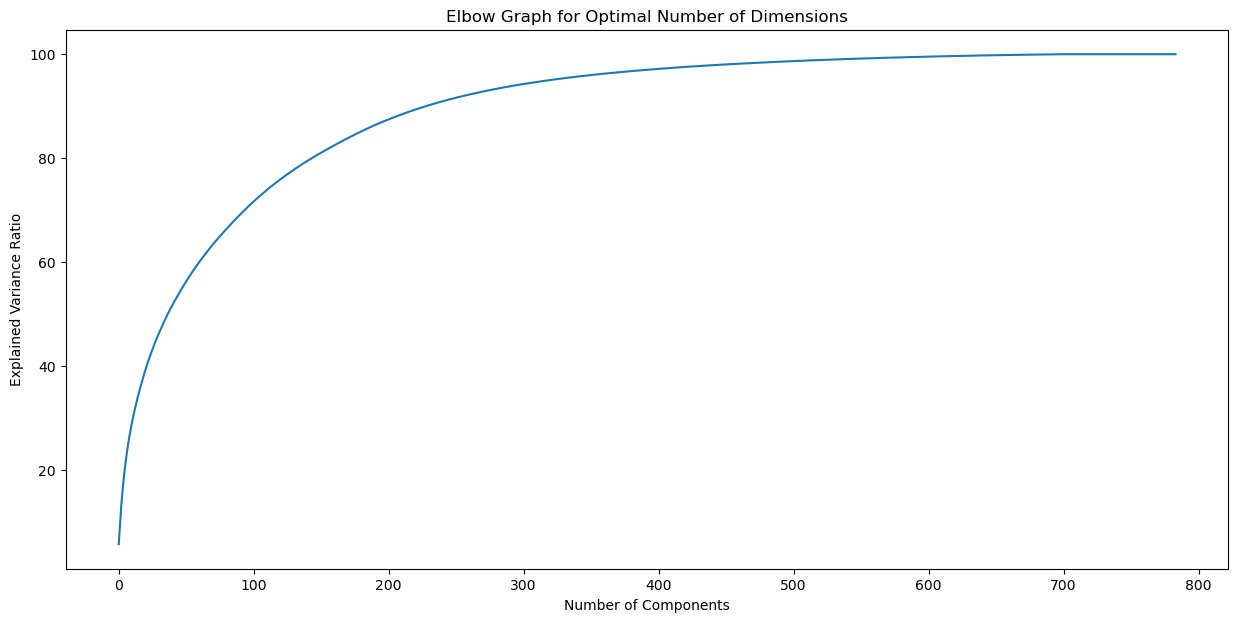

In [18]:
plt.figure(figsize=(15, 7))

plt.plot(cum_sum_exp_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio') #for each component
plt.title('Elbow Graph for Optimal Number of Dimensions')
plt.show()

In [20]:
sum(var_exp[0:350])

95.96989596467127

## 5. Model Building & Evaluation

In [21]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2)

In [22]:
pca = PCA(n_components = 350)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test) 

In [23]:
X_train_pca.shape

(33600, 350)

In [24]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [25]:
dt.fit(X_train_pca, y_train)

DecisionTreeClassifier()

In [26]:
# Making Prediction

y_pred = dt.predict(X_test_pca)

In [27]:
# Evaluate the Model

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8025
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       860
           1       0.93      0.93      0.93       930
           2       0.80      0.78      0.79       809
           3       0.76      0.78      0.77       850
           4       0.78      0.76      0.77       805
           5       0.73      0.72      0.72       784
           6       0.89      0.88      0.88       828
           7       0.82      0.81      0.81       905
           8       0.71      0.73      0.72       807
           9       0.71      0.74      0.72       822

    accuracy                           0.80      8400
   macro avg       0.80      0.80      0.80      8400
weighted avg       0.80      0.80      0.80      8400

